In [278]:
import csv
import pandas as pd
from scipy.spatial import distance
import math
import random
from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean 

K means function. It takes as input k (number of clusters we want to find) and l (a list with the coordinates of all the points). <br>
I create two lists such that:<br>
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]] <br>
If we pass inertia = True the function will return the inertia of the points after the clustering process.

In [137]:
def kmeans(k, l, inertia = False):
    p1 = [[],[]]      # points[0] = list of the coordinates of the points \\ points[1] = list of the ID number of the belonging cluster
    m1 = [[],[]]       # means[0] = list of ID number of the means \\ means[1] = list of  coordinates of the means
    for i in l:
        p1[0].append(i)
        p1[1].append(-1)
        
    for j in range(k):
        m1[0].append(j)
        m1[1].append(list(random.choice(l)))
        
    for c in range(300):    #set a max counter for how many times we iterate the process 
        m0 = deepcopy(m1)
        p0 = deepcopy(p1)

        #assignment
        for i in range(len(p0[0])):
            dist = math.inf
            for k in range(len(m0[0])):
                d = distance.euclidean(p0[0][i], m0[1][k])          #for some reason at high k there are NaN's in m0[1]
                if (d < dist):  #For each point calculate the distance between the point and each mean.
                    dist = d
                    p1[1][i] = m0[0][k]
    
        #update
        for k in range(len(m1[0])):
            index = 0
            c = np.zeros(len(p1[0][0]))
            for i in range(len(p1[1])):
                if (int(p1[1][i]) == int(m1[0][k])):
                    index += 1
                    c += np.array(p1[0][i])
            if index==0:
                print("errore")
            m1[1][k] = list(c / index)
        if (p1[1] == p0[1]):
            break
    
    
    if inertia == True:
        iner = 0
        for i in range(len(p1[0])):
            for k in range(len(m1[0])):
                if p1[1][i] == m1[0][k]:
                    iner += distance.euclidean(p1[0][i], m1[1][k])
        return (iner)
      
    return (m1, p1)

I make a list with the coordinates of each point (wine) to pass to the function "kmeans".

In [205]:
l = []

with open(r'C:\Users\39335\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)    
    # Make a list to pass to the kmeans funciton
    for row in reader:
        row.pop(0)
        row = list(map(float, row))  #make all the coordinates floats 
        l.append(row)

Now we run the function kmeans. It returns the lists <br> 
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]]

In [206]:
N = 4
print(kmeans(N, l)[1][1])

[3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 3, 1]


Compare the results we obtained with the result of sklearn.cluster.KMeans

In [85]:
from sklearn.cluster import KMeans

In [86]:
clustering = KMeans(n_clusters=N, init="random",  max_iter=500).fit(l)
clustering.predict(l)

array([0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 0, 0, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 0,
       0, 3])

The cluster are similar, that means that the kmeans function we wrote is working.
Now we want to find the right number of clusters using the elbow method.

In [139]:
ine = []
k = []
for i in range(1,10):
    ine.append(kmeans(i, l, inertia=True))
    k.append(i)

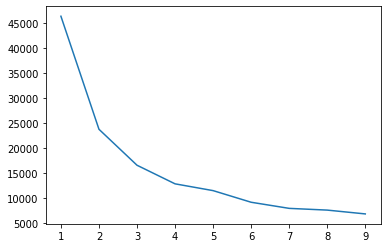

In [140]:
plt.plot(k, ine)

It looks like the optimal number of cluster is 4.


Now we want to analyse the components to understand what are the ones that are more important in the decision of the clusters. <br>
To do this we'll need to make a dataframe with the data of the wines.

In [288]:
with open(r'C:\Users\39335\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)
    
    # Make a data frame, we'll need this for the visualization
    col = ["Cultivator", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
    data = pd.DataFrame(reader, columns=col)

Add the belonging cluster to the dataframe

In [289]:
data["Cluster"] = kmeans(N, l)[1][1]

In [290]:
data

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480,2
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740,1
174,3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750,1
175,3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835,3
176,3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840,3


To understand what are the important features we will plot the mean of each feature for each of the 4 clusters. <br>
We drop the "Cultivator" column because we don't need it and split the dataframe for each cluster.

In [291]:
data = data.drop(columns = "Cultivator")
data0 = data[data['Cluster'] == 0]
data0 = data0.drop(columns = "Cluster")
data1 = data[data['Cluster'] == 1]
data1 = data1.drop(columns = "Cluster")
data2 = data[data['Cluster'] == 2]
data2 = data2.drop(columns = "Cluster")
data3 = data[data['Cluster'] == 3]
data3 = data3.drop(columns = "Cluster")

We take the mean of each column.

In [308]:
feat_means = []
means = []
for i in range(1,len(col)):
    m = []
    for k in range(N):
        name = globals()["data" + str(k)][col[i]]
        lfloat = map(float,list(name))
        m.append(mean(lfloat))
    means.append(m)

Make a barplot of the mean of each feature of each cluster.

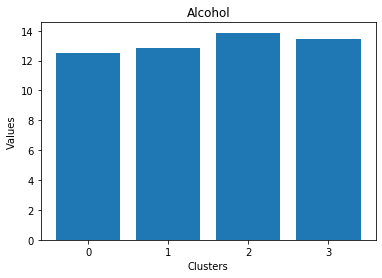

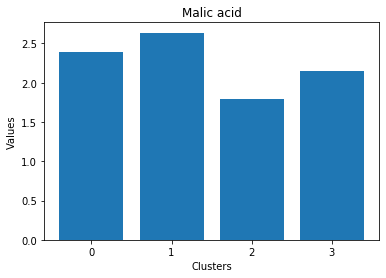

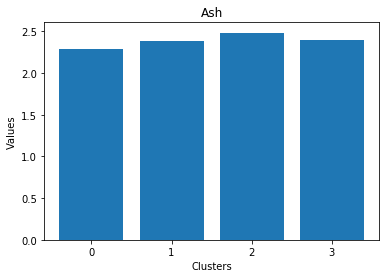

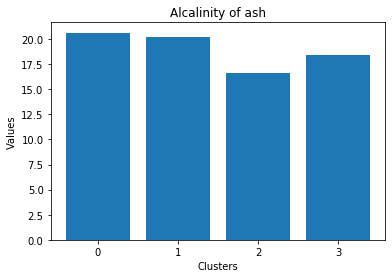

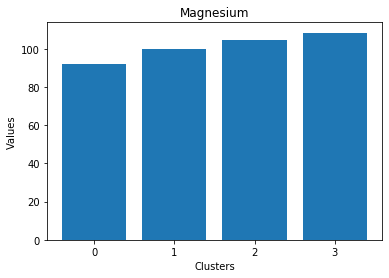

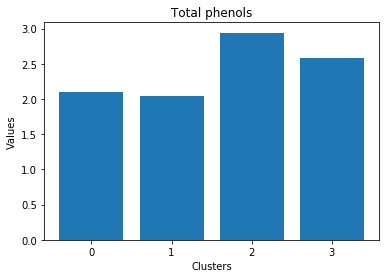

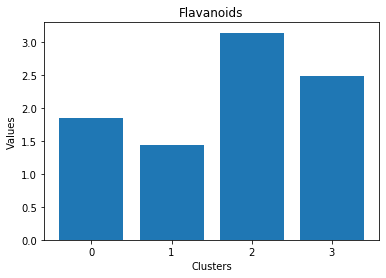

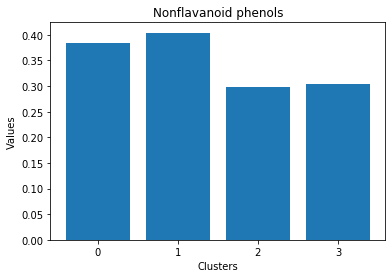

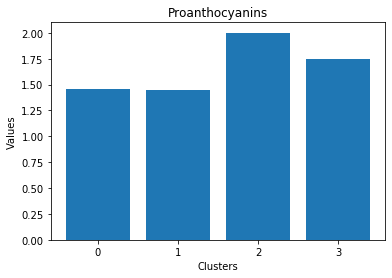

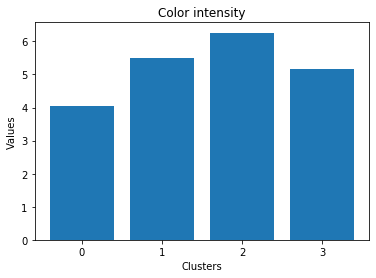

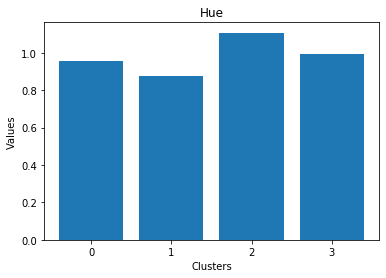

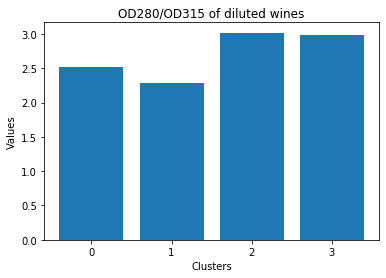

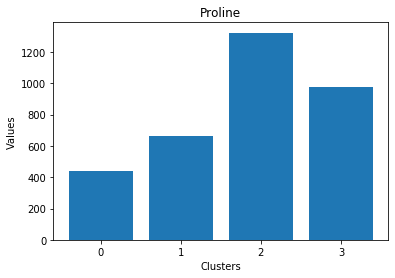

In [309]:
bars = [0,1,2,3]
index = 1
for height in means:
    plt.title(col[index])
    index += 1
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.xlabel('Clusters')
    plt.ylabel('Values')
    plt.show()

We can see that the features that most characterize the clusters are the ones with an higher difference of means. In our case they are: Flavanoids and Proline.